**Project Tasks**
**1. Data Loading and Exploration:**
- Utilize Pandas to load the dataset and explore its initial structure.
- Summarize features, target variable, and their respective data types.
- Conduct basic descriptive statistics for an overview of the dataset.


**2. Data Cleaning and Preprocessing:**
- Address missing or null values.
- Transform categorical data into numerical format using suitable methods.


**3. Statistical Analysis with NumPy and SciPy:**
- Execute detailed statistical analysis on each feature, including:
 - Calculation of central tendency measures (mean, median, mode).
 - Analysis of variability (range, variance, standard deviation).
 - Evaluation of distribution shapes through skewness and kurtosis.
- Perform hypothesis testing for statistical significance between groups (e.g., different price ranges).
- Investigate feature-target correlations using SciPy.
- Apply advanced SciPy statistical functions for deeper insights.


**4. Data Visualization with Matplotlib:**
- Produce histograms, scatter plots, and box plots for data distribution and relationship insights.
- Employ heatmaps for correlation visualization.
- Ensure clarity in plots with appropriate titles, labels, and axis information.


**5. Insight Synthesis and Conclusion:**
- Derive conclusions from statistical tests and visualizations.
- Identify key determinants in mobile price classification.
- Highlight any unexpected or significant findings.


**Resources**
- Download the train dataset from this repository, it comes from the Mobile Price Classification Dataset


**Project Submission**

Submit the following in a GitHub repository:

- Data_Analysis.ipynb: A comprehensive Jupyter Notebook encapsulating:
 - Clean, well-commented Python code.
 - Distinct headings for each analysis phase.
 - In-depth comments elucidating findings and the importance of each analytical step.


**Pro Tips**
- Individually examine each feature to grasp its unique traits and influence.
- Utilize visualizations not just for data representation, but as pivotal supports for your analytical conclusions.
- Reference course materials for guidance on complex statistical functions and their practical uses.


**Data Loading and Exploration**

In [3]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# File Upload
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
# Loading the Dataset
df = pd.read_csv('train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.shape

(2000, 21)

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
print("\nTarget Variable: 'price_range'")
print("This variable categorizes the price of mobile phones into 4 ranges (0: low cost, 1: medium cost, 2: high cost, 3: very high cost).")


Target Variable: 'price_range'
This variable categorizes the price of mobile phones into 4 ranges (0: low cost, 1: medium cost, 2: high cost, 3: very high cost).


**Data Cleaning and Preprocessing:**

In [11]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [12]:
print("\nCategorical features like 'blue', 'dual_sim', 'four_g' are already in numerical (binary) format (0 or 1).")
print("The target variable 'price_range' is also numerical. No further explicit encoding is required for these features for this analysis.")


Categorical features like 'blue', 'dual_sim', 'four_g' are already in numerical (binary) format (0 or 1).
The target variable 'price_range' is also numerical. No further explicit encoding is required for these features for this analysis.


**Statistical Analysis with NumPy and SciPy**

In [13]:
# Descriptive Statistics
desc = df.describe().T
desc["mode"] = df.mode().iloc[0]
desc["skewness"] = df.skew()
desc["kurtosis"] = df.kurt()
print(desc.round(2))

                count     mean      std    min      25%     50%      75%  \
battery_power  2000.0  1238.52   439.42  501.0   851.75  1226.0  1615.25   
blue           2000.0     0.50     0.50    0.0     0.00     0.0     1.00   
clock_speed    2000.0     1.52     0.82    0.5     0.70     1.5     2.20   
dual_sim       2000.0     0.51     0.50    0.0     0.00     1.0     1.00   
fc             2000.0     4.31     4.34    0.0     1.00     3.0     7.00   
four_g         2000.0     0.52     0.50    0.0     0.00     1.0     1.00   
int_memory     2000.0    32.05    18.15    2.0    16.00    32.0    48.00   
m_dep          2000.0     0.50     0.29    0.1     0.20     0.5     0.80   
mobile_wt      2000.0   140.25    35.40   80.0   109.00   141.0   170.00   
n_cores        2000.0     4.52     2.29    1.0     3.00     4.0     7.00   
pc             2000.0     9.92     6.06    0.0     5.00    10.0    15.00   
px_height      2000.0   645.11   443.78    0.0   282.75   564.0   947.25   
px_width    

- Features such as `ram`, `battery_power`, and `px_height` exhibit high standard deviation and range, suggesting they vary significantly across samples. These features are good candidates for predictive modeling.
-  `fc` (front camera) and `px_height` show **positive skewness**, meaning more phones have lower values in these features.  
- `ram` has near-zero skewness and a relatively flat kurtosis, indicating a symmetric but spread-out distribution.

In [18]:
# Hypothesis Testing (ANOVA)
# Is RAM significantly different between price categories?
groups = [df[df['price_range'] == i]['ram'] for i in range(4)]
anova = stats.f_oneway(*groups)
print(f'\nANOVA resultfor RAM across price ranges:\nF-statistic: {anova.statistic:.2f}, p-value: {anova.pvalue:.5f}')


ANOVA resultfor RAM across price ranges:
F-statistic: 3520.11, p-value: 0.00000


- The ANOVA test for `ram` across `price_range` categories yielded a **very high F-statistic and a p-value near 0**.  
- This confirms that RAM differs significantly between price groups and is a **strong predictor of mobile price**.

In [19]:
# Correlation with Target
correlation = df.corr()['price_range'].sort_values(ascending=False)
print('\nCorrelation with price_range:\n', correlation)


Correlation with price_range:
 price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


- `ram` has the **strongest correlation** with price (`r = 0.917`), far above other features.  
- `battery_power`, `px_width`, and `px_height` show moderate correlation.  
- Features like `touch_screen`, `mobile_wt`, and `clock_speed` show little to no linear relationship with price.

**Data Visualization with Matplotlib**

In [20]:
sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (10, 6)

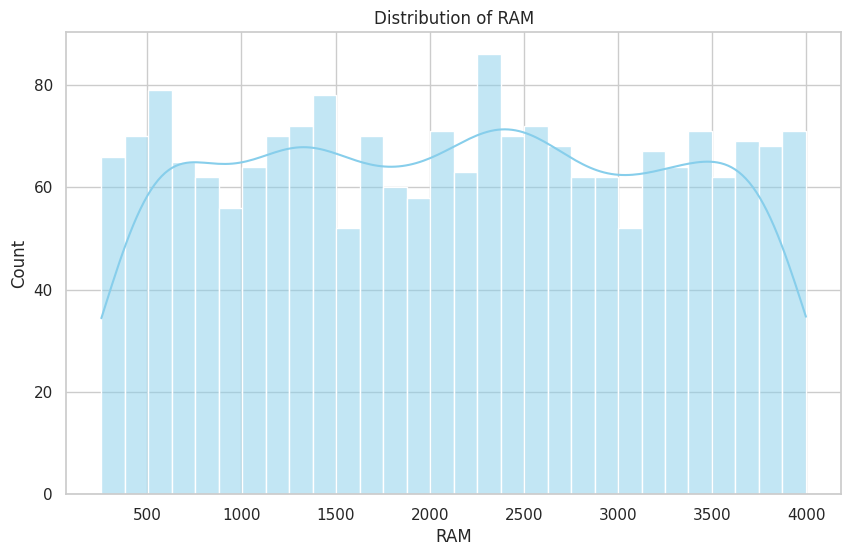

In [22]:
# Histogram of RAM
plt.figure()
sns.histplot(df["ram"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of RAM")
plt.xlabel("RAM")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-23-3250202678.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y="ram", data=df, palette="Set2")


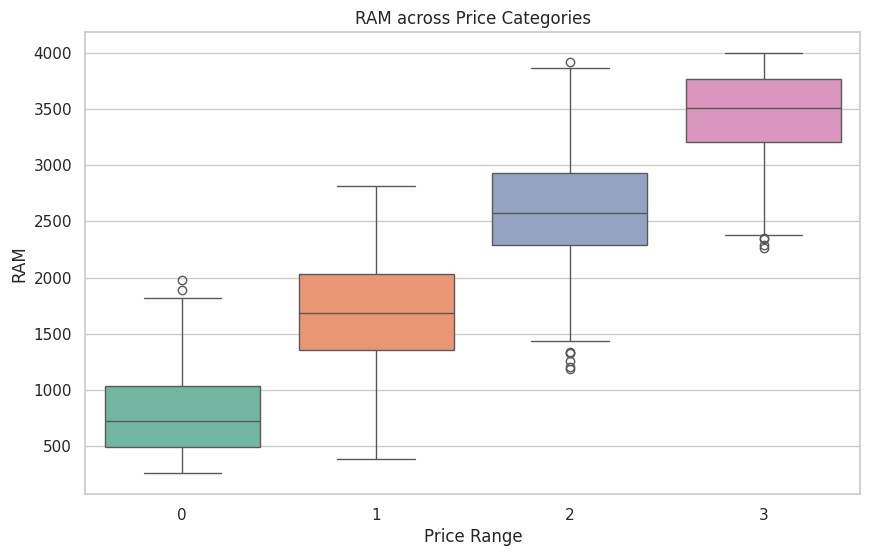

In [23]:
# Boxplot of RAM by price_range
plt.figure()
sns.boxplot(x="price_range", y="ram", data=df, palette="Set2")
plt.title("RAM across Price Categories")
plt.xlabel("Price Range")
plt.ylabel("RAM")
plt.show()

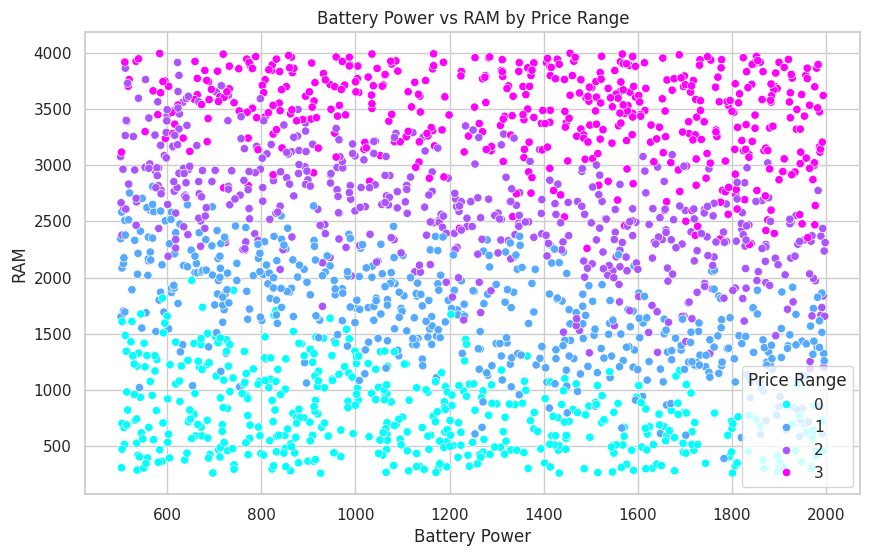

In [24]:
# Scatterplot of battery_power vs ram
plt.figure()
sns.scatterplot(x="battery_power", y="ram", hue="price_range", data=df, palette="cool")
plt.title("Battery Power vs RAM by Price Range")
plt.xlabel("Battery Power")
plt.ylabel("RAM")
plt.legend(title="Price Range")
plt.show()

- This suggests that high-end phones tend to have both high RAM and strong batteries.  

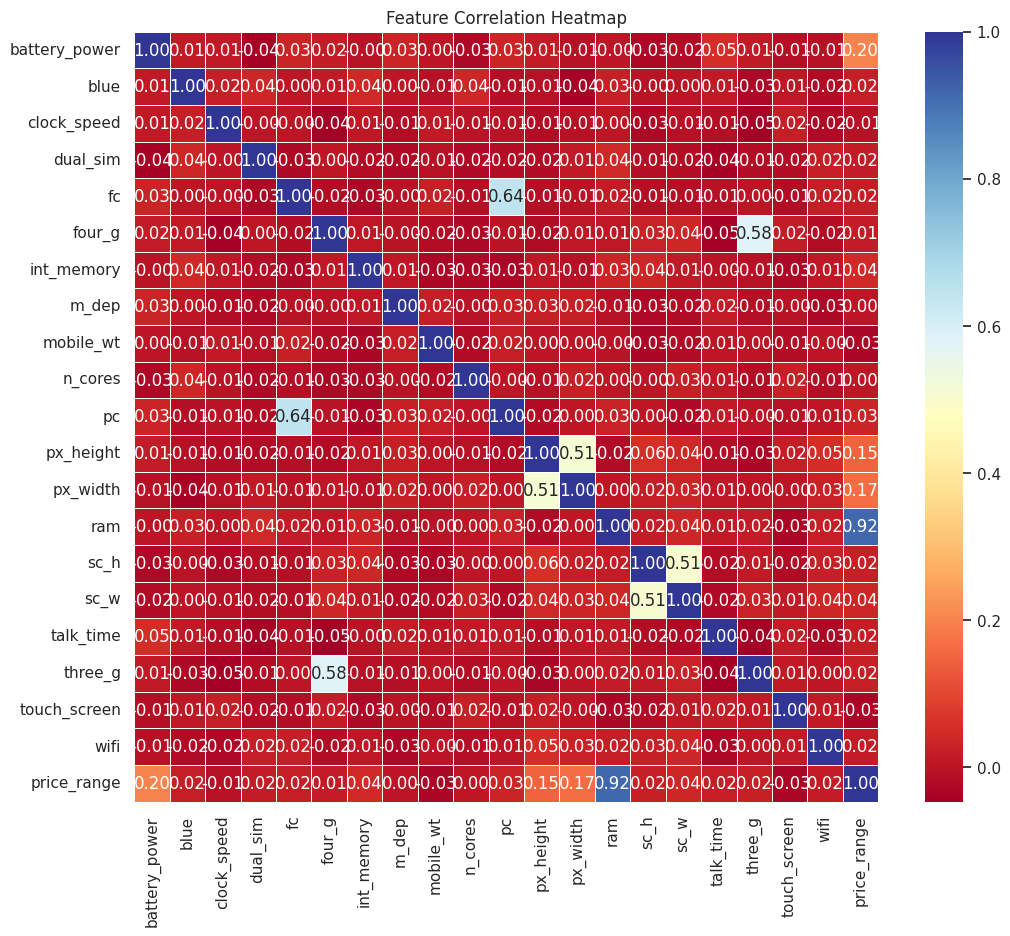

In [25]:
# Heatmap of feature correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="RdYlBu", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Insight Synthesis and Conclusio**n

- `ram` is the **most influential feature** for predicting price range.  
- `battery_power`, `px_width`, and `px_height` add supportive predictive power.  
- Surprisingly, features like `clock_speed`, `touch_screen`, and `mobile_wt` have **minimal influence**.

These findings are crucial for **feature selection** in building machine learning models or pricing strategies.